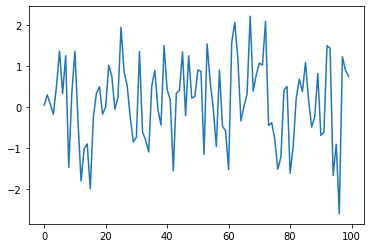

In [2]:
import numpy as np
import matplotlib.pyplot as plt
def generate_data(n):
    ϵ_values = []
    for i in range(n):
        e = np.random.randn()
        ϵ_values.append(e)
    return ϵ_values
data = generate_data(100)
plt.plot(data)
plt.show()

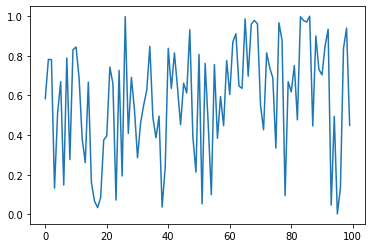

In [3]:
def generate_data(n, generator_type):
    ϵ_values = []
    for i in range(n):
        if generator_type == 'U':
            e = np.random.uniform(0, 1)
        else:
            e = np.random.randn()
        ϵ_values.append(e)
    return ϵ_values

data = generate_data(100, 'U')
plt.plot(data)
plt.show()

In [5]:
def factorial(n):
    k=1
    for i in range(n):
        k=k *(i+1)
    return k

factorial(3)

6

In [7]:
from numpy.random import uniform
def binomial_rv(n, p):
    count = 0
    for i in range(n):
        U = uniform()
        if U < p:
            count +=1 # Or count += 1
    return count

binomial_rv(10, 0.5)

7

In [1]:
from numpy.random import uniform
def draw(k): # pays if k consecutive successes in a sequence
    payoff = 0
    count = 0
    for i in range(10):
        U = uniform()
        count = count + 1 if U < 0.5 else 0
        print(count) # print counts for clarity
        if count == k:
            payoff = 1
    return payoff

draw(1)

0
1
0
0
1
0
1
0
0
0


1

In [4]:
def draw_new(k): # pays if k successes in a sequence
    payoff = 0
    count = 0
    for i in range(10):
        U = uniform()
        count = count + ( 1 if U < 0.5 else 0 )
        print(count)
        if count == k:
            payoff = 1
    
    return payoff

draw_new(3)

0
0
0
0
1
2
3
4
5
5


1

In [5]:
x=(1,'b')

In [6]:
type(x)

tuple

In [7]:
a = [2, 4, 6, 8]
a[1:]

[4, 6, 8]

In [8]:
a = [2, 4, 6, 8]
a[1:3]

[4, 6]

In [9]:
a[-3]

4

In [10]:
a[-4:]

[2, 4, 6, 8]

In [11]:
#插值写法   f'{variable}'
countries = ('Japan', 'Korea', 'China')
cities = ('Tokyo', 'Seoul', 'Beijing')
for country, city in zip(countries, cities):
    print(f'The capital of {country} is {city}')

The capital of Japan is Tokyo
The capital of Korea is Seoul
The capital of China is Beijing


In [12]:
letter_list = ['a', 'b', 'c']
for index, letter in enumerate(letter_list):
    print(f"letter_list[{index}] = '{letter}'")

letter_list[0] = 'a'
letter_list[1] = 'b'
letter_list[2] = 'c'


In [13]:
animals = ['dog', 'cat', 'bird']
plurals = [animal + 's' for animal in animals]
plurals

['dogs', 'cats', 'birds']

In [15]:
def f(x):
    """
    This function squares its argument
    """
    return x**2

In [16]:
f?

In [17]:
f??

In [18]:
x_vals=[1,2,3]
y_vals=[1,1,1]
sum(x*y for x,y in zip(x_vals,y_vals))

6

In [19]:
sum(x%2==0 for x in range(100))

50

In [20]:
pairs=((2,5),(4,2),(9,8),(12,10))
sum([x%2==0 and y%2==0 for x,y in pairs])

2

In [21]:
pairs=((2,5),(4,2),(9,8),(12,10))
sum(x%2==0 and y%2==0 for x,y in pairs)

2

In [22]:
def p(x, coeff):
    return sum(a * x**i for i, a in enumerate(coeff))
p(1, (2, 4))

6

In [24]:
def f(string):
    count=0
    for letter in string:
        if letter==letter.upper() and letter.isalpha():
            count+=1
    return count
f("FUCK")

4

In [29]:
def f(seq_a, seq_b):
    is_subset= True
    for a in seq_a:
        if a not in seq_b:
            is_subset=False
    return is_subset

print(f([1,2], [1,2,3]))

True


In [32]:
def linapprox(f,a,b,n,x):
    """
    Evaluates the piecewise linear interpolant of f at x on the interval
    [a, b], with n evenly spaced grid points.
    Parameters
    ==========
    f : function
    The function to approximate
    x, a, b : scalars (floats or integers)
    Evaluation point and endpoints, with a <= x <= b
    n : integer
    Number of grid points
    Returns
    A float. The interpolant evaluated at x
    """
    length_of_interval=b-a
    num_subintervals=n-1
    step=length_of_interval/num_subintervals
    
    point =a
    while point<=x:
        point += step
        
    u,v =point-step,point
    
    return f(u)+(x-u)*(f(v)-f(f))/(v-u)

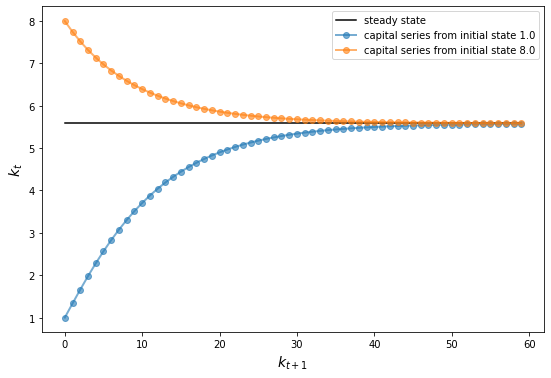

In [34]:
import matplotlib.pyplot as plt
class Solow:
    r"""
    Implements the Solow growth model with the update rule
    k_{t+1} = [(s z k^α_t) + (1 - δ)k_t] /(1 + n)
    """
    def __init__(self, n=0.05, # population growth rate
        s=0.25, # savings rate
        δ=0.1, # depreciation rate
        α=0.3, # share of labor
        z=2.0, # productivity
        k=1.0): # current capital stock
        self.n, self.s, self.δ, self.α, self.z = n, s, δ, α, z
        self.k = k
    def h(self):
        "Evaluate the h function"
        # Unpack parameters (get rid of self to simplify notation)
        n, s, δ, α, z = self.n, self.s, self.δ, self.α, self.z
        # Apply the update rule
        return (s * z * self.k**α + (1 - δ) * self.k) / (1 + n)
    def update(self):
        "Update the current state (i.e., the capital stock)."
        self.k = self.h()
    def steady_state(self):
        "Compute the steady state value of capital."
        # Unpack parameters (get rid of self to simplify notation)
        n, s, δ, α, z = self.n, self.s, self.δ, self.α, self.z
        # Compute and return steady state
        return ((s * z) / (n + δ))**(1 / (1 - α))
    def generate_sequence(self, t):
        "Generate and return a time series of length t"
        path = []
        for i in range(t):
            path.append(self.k)
            self.update()
        return path
    
s1=Solow()
s2=Solow(k=8.0)
T=60
fig, ax = plt.subplots(figsize=(9, 6))
ax.plot([s1.steady_state()]*T, 'k-', label='steady state')

# Plot time series for each economy
for s in s1, s2:
    lb = f'capital series from initial state {s.k}'
    ax.plot(s.generate_sequence(T), 'o-', lw=2, alpha=0.6, label=lb)

ax.set_xlabel('$k_{t+1}$', fontsize=14)
ax.set_ylabel('$k_t$', fontsize=14)
ax.legend()
plt.show()